In [1]:
import pandas as pd

In [2]:
dt=pd.read_excel("/content/NY_StockExchange_Fundamental.xls")

In [3]:
dt.head()

,Index,Ticker Symbol,For Year,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year2,Earnings Per Share,Estimated Shares Outstanding
0,378,COTY,NaN,2003-06-30,133000,926000,19000,2975,-74000,1672000,...,1993000,1117000,43000,2662000,2705000,1577000,0,NaN,NaN,NaN
1,379,COTY,NaN,2004-06-30,263000,275000,22000,79,-50000,10247000,...,6639000,1122000,4611000,2577000,7188000,1514000,0,NaN,NaN,NaN
2,380,COTY,NaN,2006-02-28,13078000,1351000,3138000,552,-1361000,57262000,...,27083000,13110000,8869000,94077000,102946000,79562000,0,NaN,NaN,NaN
3,381,COTY,NaN,2007-02-28,15569000,-2979000,-54669000,134,-896000,74828000,...,48658000,22048000,-77138000,294033000,216895000,99642000,0,NaN,NaN,NaN
4,206,BBY,2012.0,2012-03-03,7876000000,41000000,77000000,33,-766000000,0,...,10297000000,8855000000,3745000000,12260000000,16005000000,45457000000,0,2012.0,-3.36,3.663690e+08


In [ ]:
dt.shape

(1781, 80)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 80 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Index                                                1781 non-null   int64         
 1   Ticker Symbol                                        1781 non-null   object        
 2   For Year                                             1608 non-null   float64       
 3   Period Ending                                        1781 non-null   datetime64[ns]
 4   Accounts Payable                                     1781 non-null   int64         
 5   Accounts Receivable                                  1781 non-null   int64         
 6   Add'l income/expense items                           1781 non-null   int64         
 7   After Tax ROE                                        1781 non-null   int64         
 8 

In [ ]:
dt.isnull().sum()

Index                             0
Ticker Symbol                     0
For Year                        173
Period Ending                     0
Accounts Payable                  0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year2                       173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 80, dtype: int64

In [4]:
null_columns = dt.columns[dt.isnull().any()]
for col in null_columns:
    print(f"Column '{col}' has {dt[col].isnull().sum()} null values.")

Column 'For Year' has 173 null values.
Column 'Cash Ratio' has 299 null values.
Column 'Current Ratio' has 299 null values.
Column 'Quick Ratio' has 299 null values.
Column 'For Year2' has 173 null values.
Column 'Earnings Per Share' has 219 null values.
Column 'Estimated Shares Outstanding' has 219 null values.


In [5]:
dt=dt.drop(["For Year2","For Year","Index","Period Ending"],axis=1)

In [6]:
dt.shape

(1781, 76)

In [ ]:
dt.isnull().sum().sum()

1335

In [ ]:
col=dt.columns

In [ ]:
col

Index(['Ticker Symbol', 'Accounts Payable', 'Accounts Receivable',
       'Add'l income/expense items', 'After Tax ROE', 'Capital Expenditures',
       'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Common Stocks', 'Cost of Revenue',
       'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges',
       'Depreciation', 'Earnings Before Interest and Tax',
       'Earnings Before Tax', 'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
       'Net Income Applica

In [ ]:
col[0:20]

Index(['Ticker Symbol', 'Accounts Payable', 'Accounts Receivable',
       'Add'l income/expense items', 'After Tax ROE', 'Capital Expenditures',
       'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Common Stocks', 'Cost of Revenue',
       'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges',
       'Depreciation', 'Earnings Before Interest and Tax',
       'Earnings Before Tax', 'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary'],
      dtype='object')

In [ ]:
dt_for_cor_matrix_1=dt[['Ticker Symbol', 'Accounts Payable', 'Accounts Receivable',
       "Add'l income/expense items", 'After Tax ROE', 'Capital Expenditures',
       'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Common Stocks', 'Cost of Revenue',
       'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges',
       'Depreciation', 'Earnings Before Interest and Tax',
       'Earnings Before Tax', 'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary','Earnings Per Share']]

In [ ]:
cor_matrix_1=round(dt_for_cor_matrix_1.corr(),2)

<ipython-input-38-32db8e1c0f38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix_1=round(dt_for_cor_matrix_1.corr(),2)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

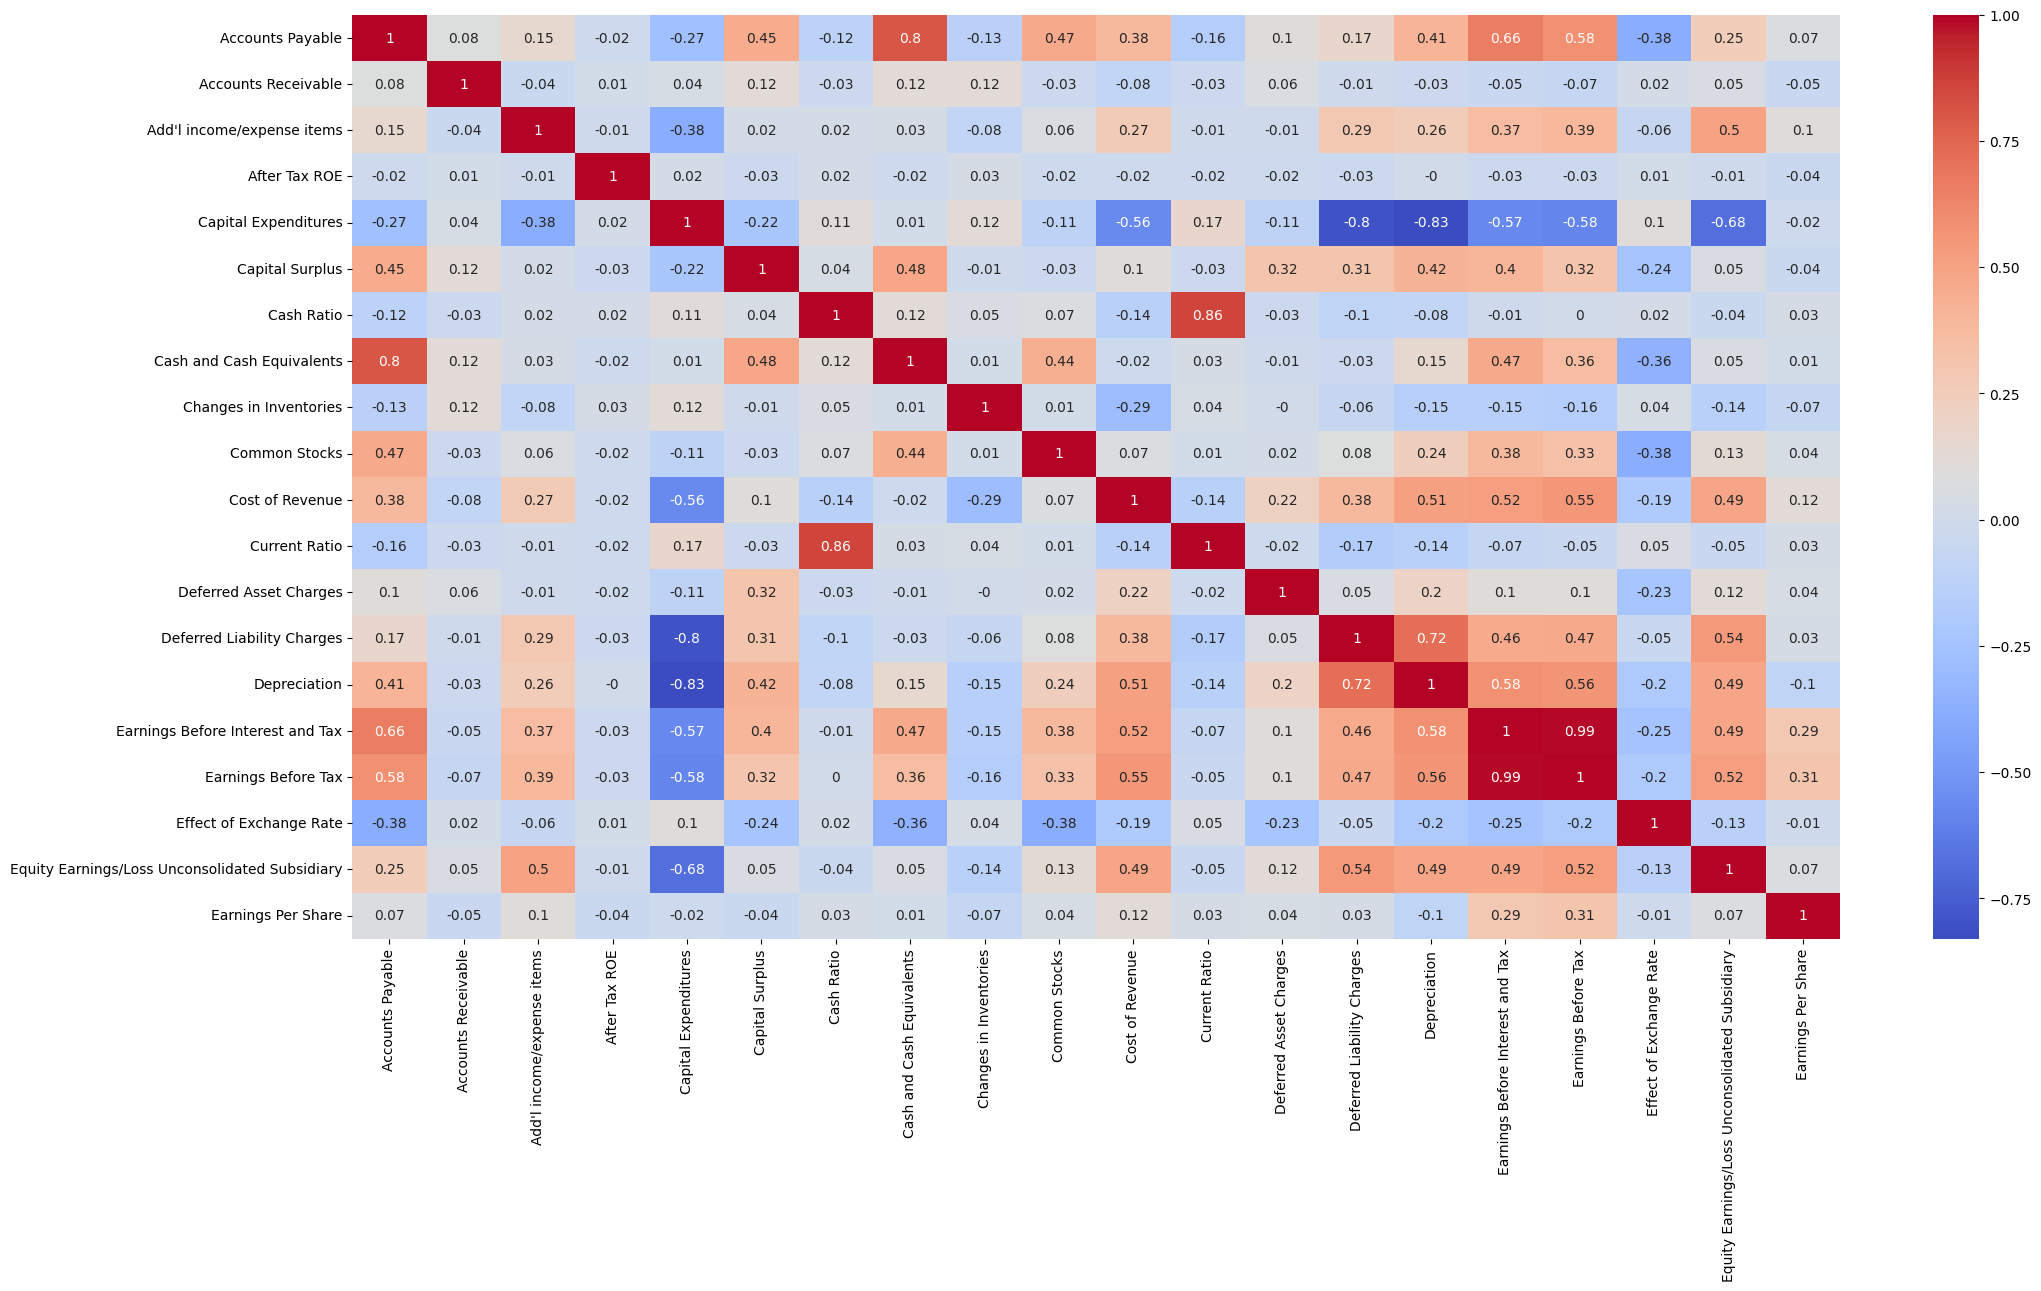

In [ ]:
plt.figure(figsize = (24, 12))
sb.heatmap(cor_matrix_1, annot=True, cmap="coolwarm") # Making heatmap to visualise correlation matrix in better way. Here Annot:: used to print value , coolwarm::need to show color range
plt.show()

In [ ]:
col[20:41]

Index(['Fixed Assets', 'Goodwill', 'Gross Margin', 'Gross Profit',
       'Income Tax', 'Intangible Assets', 'Interest Expense', 'Inventory',
       'Investments', 'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments'],
      dtype='object')

In [ ]:
dt_for_cor_matrix_2=dt[['Fixed Assets', 'Goodwill', 'Gross Margin', 'Gross Profit',
       'Income Tax', 'Intangible Assets', 'Interest Expense', 'Inventory',
       'Investments', 'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments','Earnings Per Share']]

In [ ]:
cor_matrix_2=round(dt_for_cor_matrix_2.corr(),2)

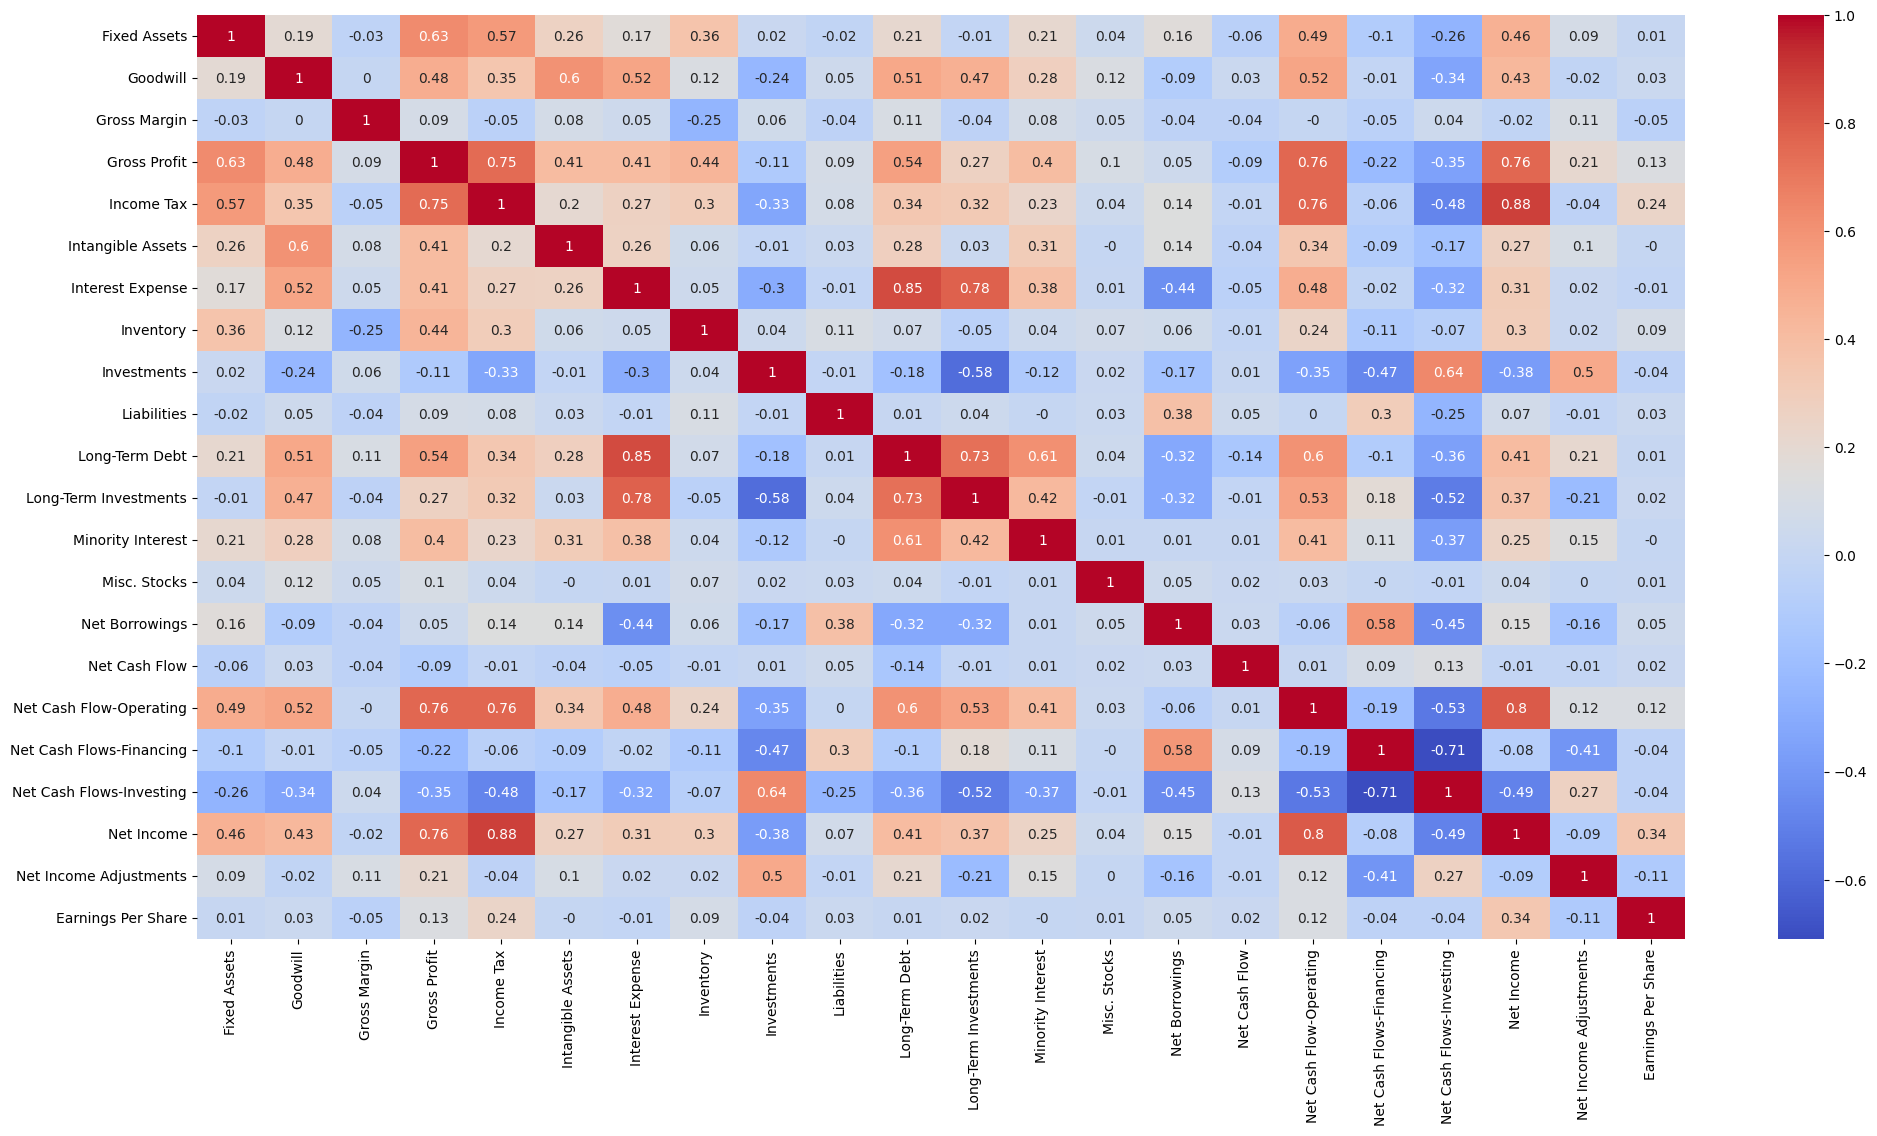

In [ ]:
plt.figure(figsize = (24, 12))
sb.heatmap(cor_matrix_2, annot=True, cmap="coolwarm") # Making heatmap to visualise correlation matrix in better way. Here Annot:: used to print value , coolwarm::need to show color range
plt.show()

In [ ]:
col[41:62]

Index(['Net Income Applicable to Common Shareholders',
       'Net Income-Cont. Operations', 'Net Receivables', 'Non-Recurring Items',
       'Operating Income', 'Operating Margin', 'Other Assets',
       'Other Current Assets', 'Other Current Liabilities', 'Other Equity',
       'Other Financing Activities', 'Other Investing Activities',
       'Other Liabilities', 'Other Operating Activities',
       'Other Operating Items', 'Pre-Tax Margin', 'Pre-Tax ROE',
       'Profit Margin', 'Quick Ratio', 'Research and Development',
       'Retained Earnings'],
      dtype='object')

In [ ]:
dt_for_cor_matrix_3=dt[['Net Income Applicable to Common Shareholders',
       'Net Income-Cont. Operations', 'Net Receivables', 'Non-Recurring Items',
       'Operating Income', 'Operating Margin', 'Other Assets',
       'Other Current Assets', 'Other Current Liabilities', 'Other Equity',
       'Other Financing Activities', 'Other Investing Activities',
       'Other Liabilities', 'Other Operating Activities',
       'Other Operating Items', 'Pre-Tax Margin', 'Pre-Tax ROE',
       'Profit Margin', 'Quick Ratio', 'Research and Development',
       'Retained Earnings','Earnings Per Share']]

In [ ]:
cor_matrix_3=round(dt_for_cor_matrix_3.corr(),2)

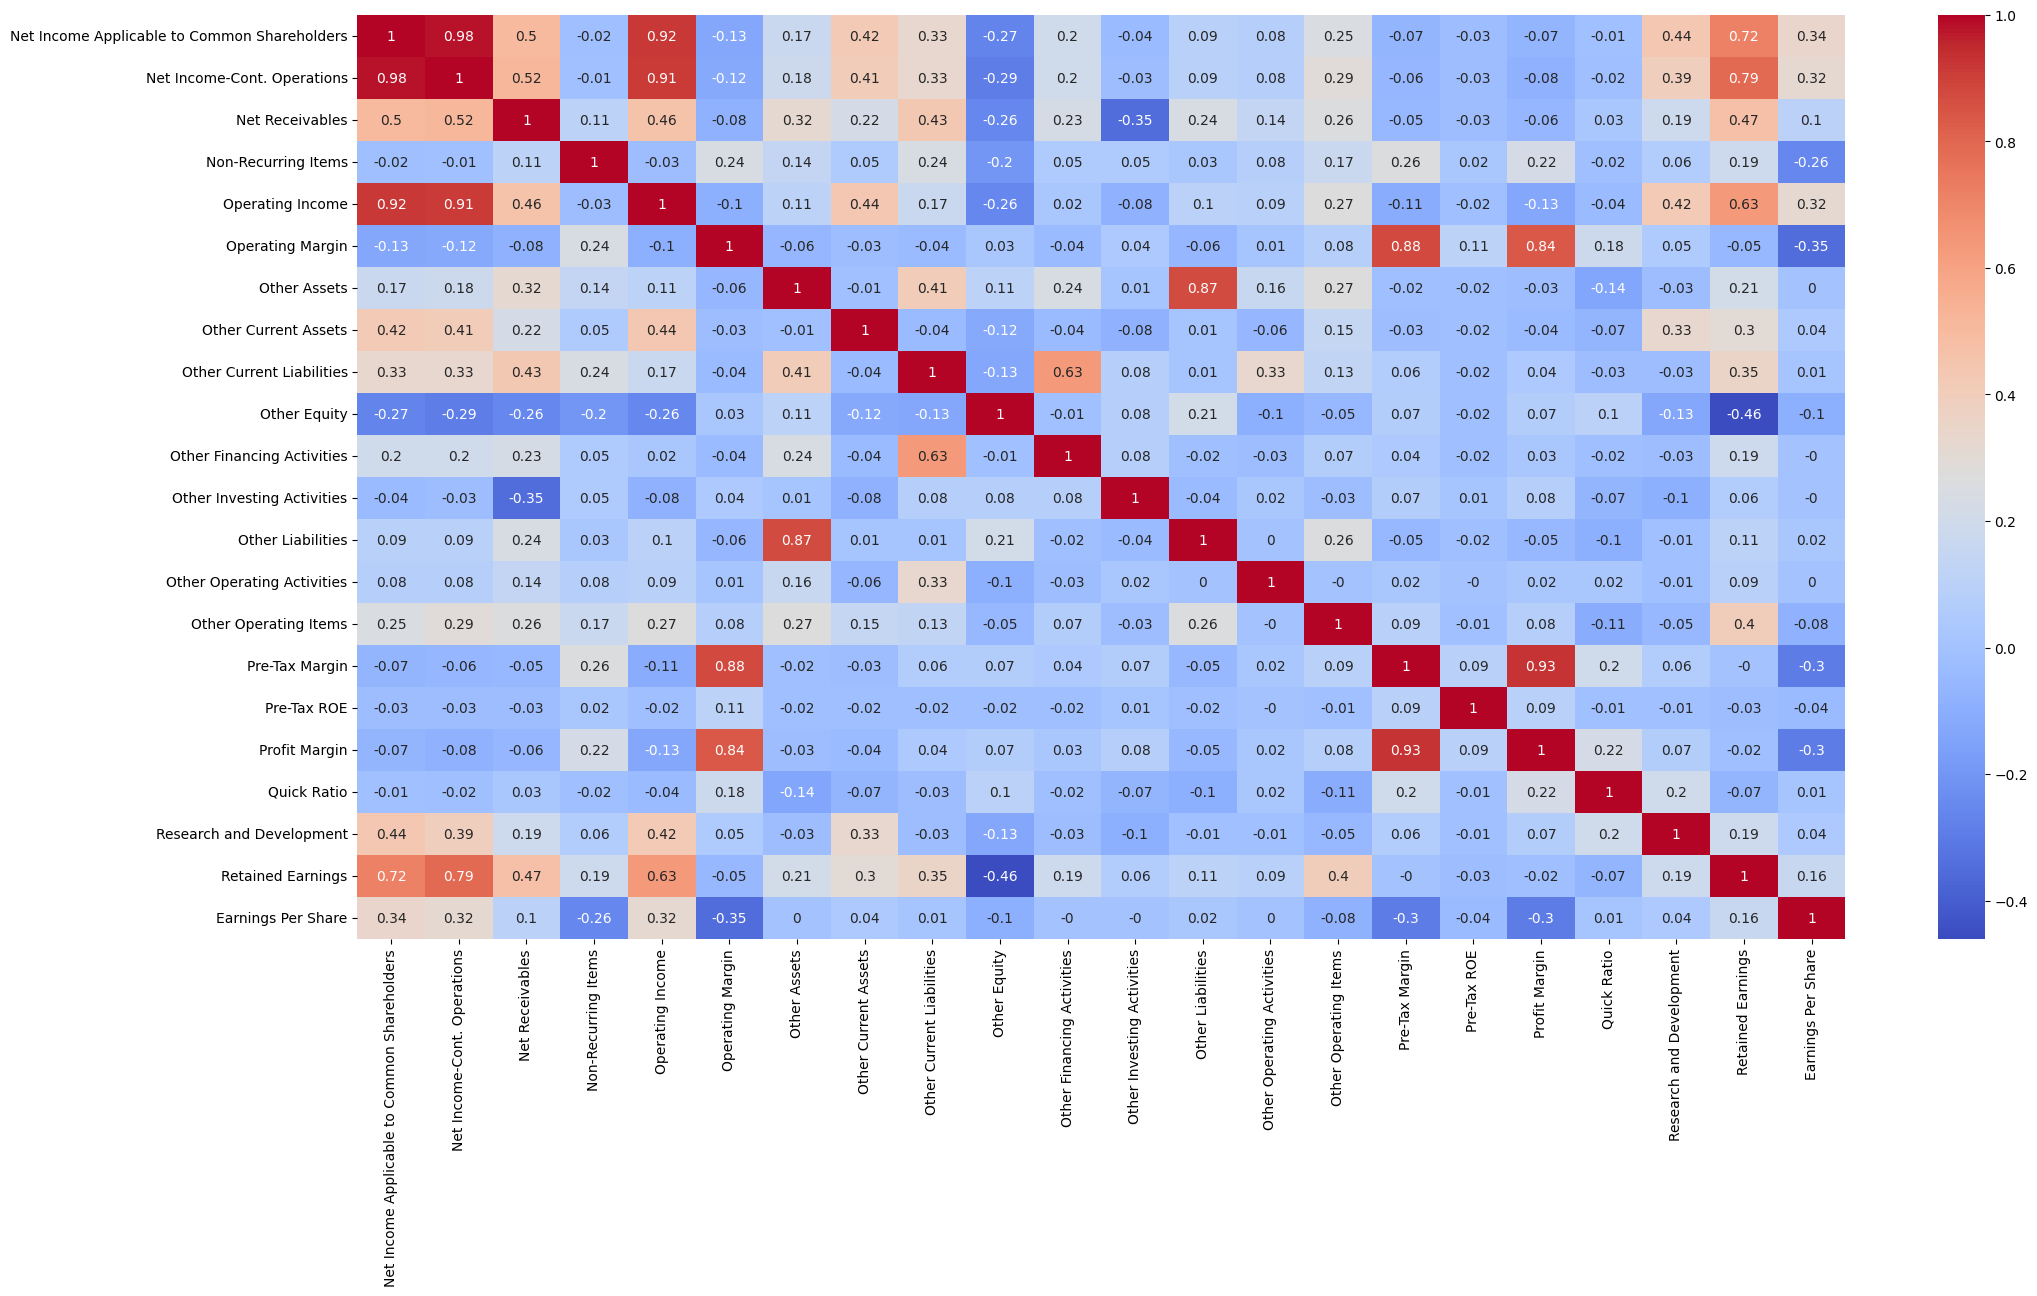

In [ ]:
plt.figure(figsize = (24, 12))
sb.heatmap(cor_matrix_3, annot=True, cmap="coolwarm") # Making heatmap to visualise correlation matrix in better way. Here Annot:: used to print value , coolwarm::need to show color range
plt.show()

In [ ]:
col[62:]

Index(['Sale and Purchase of Stock', 'Sales, General and Admin.',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Short-Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Equity', 'Total Liabilities',
       'Total Liabilities & Equity', 'Total Revenue', 'Treasury Stock',
       'Earnings Per Share', 'Estimated Shares Outstanding'],
      dtype='object')

In [ ]:
dt_for_cor_matrix_4=dt[['Sale and Purchase of Stock', 'Sales, General and Admin.',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Short-Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Equity', 'Total Liabilities',
       'Total Liabilities & Equity', 'Total Revenue', 'Treasury Stock',
       'Estimated Shares Outstanding','Earnings Per Share']]

In [ ]:
cor_matrix_4=round(dt_for_cor_matrix_4.corr(),2)

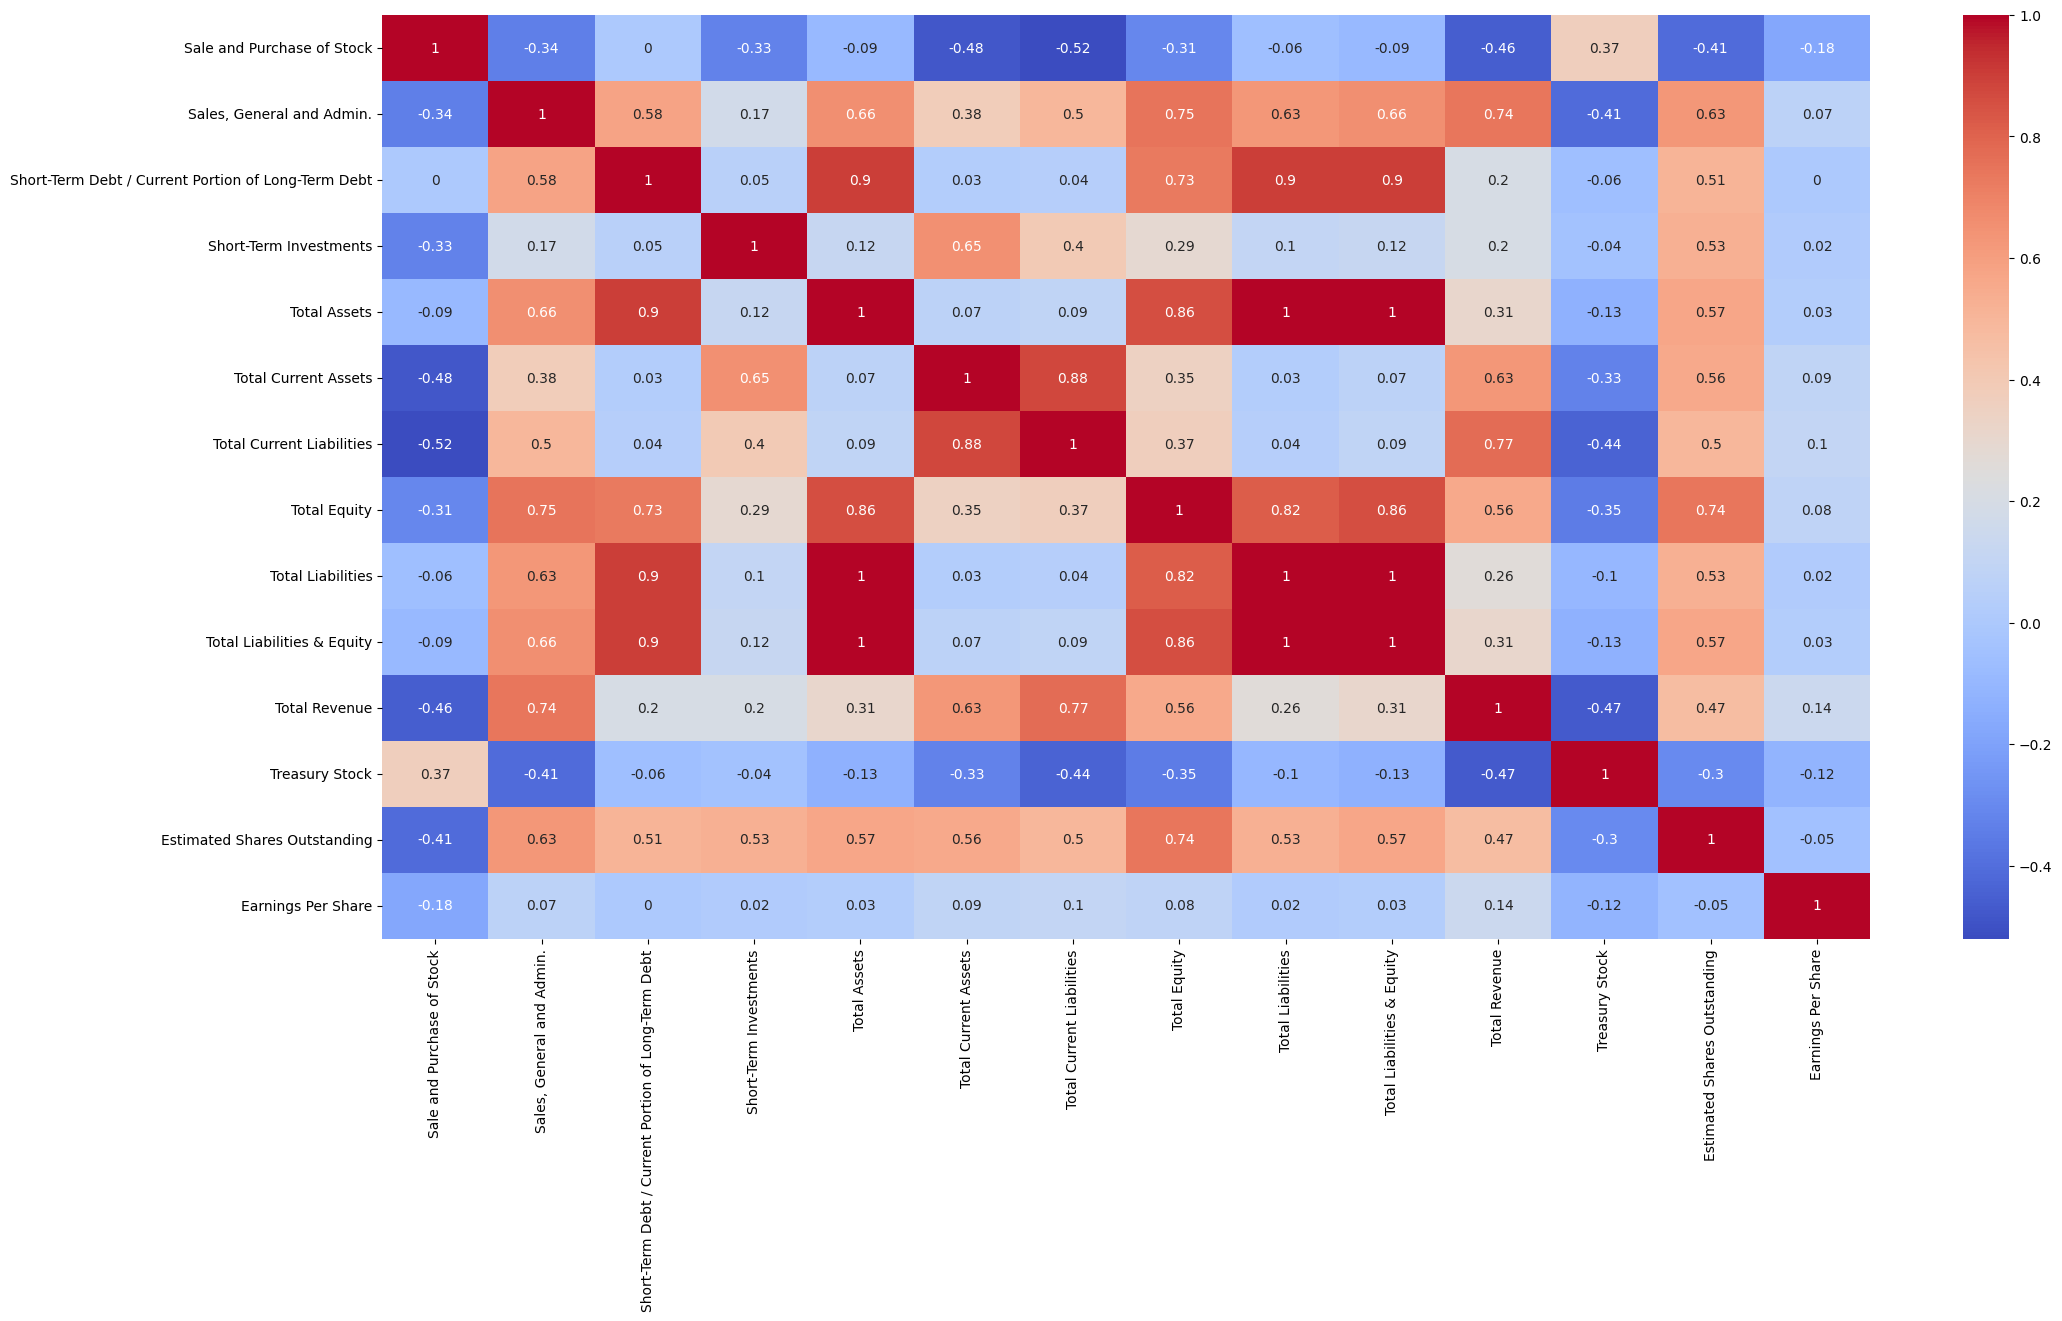

In [ ]:
plt.figure(figsize = (24, 12))
sb.heatmap(cor_matrix_4, annot=True, cmap="coolwarm") # Making heatmap to visualise correlation matrix in better way. Here Annot:: used to print value , coolwarm::need to show color range
plt.show()

In [ ]:
col

Index(['Ticker Symbol', 'Accounts Payable', 'Accounts Receivable',
       'Add'l income/expense items', 'After Tax ROE', 'Capital Expenditures',
       'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Common Stocks', 'Cost of Revenue',
       'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges',
       'Depreciation', 'Earnings Before Interest and Tax',
       'Earnings Before Tax', 'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
       'Net Income Applica

In [7]:
useless_col=['Capital Expenditures','Cash Ratio','Cash and Cash Equivalents','Current Ratio','Deferred Liability Charges','Effect of Exchange Rate',
          'Earnings Before Interest and Tax','Fixed Assets','Goodwill','Intangible Assets', 'Interest Expense','Liabilities', 'Long-Term Debt', 'Long-Term Investments',
            'Minority Interest', 'Misc. Stocks','Net Cash Flow','Net Income-Cont. Operations','Other Assets','Other Current Liabilities','Other Financing Activities',
             'Other Investing Activities','Other Liabilities', 'Other Operating Activities','Quick Ratio','Pre-Tax Margin','Short-Term Debt / Current Portion of Long-Term Debt',
       'Short-Term Investments', 'Total Assets','Total Liabilities','Total Liabilities & Equity']

In [8]:
final_data=dt.drop(useless_col,axis=1)

In [9]:
final_data.shape

(1781, 45)

In [10]:
null_columns = final_data.columns[final_data.isnull().any()]
for col in null_columns:
    print(f"Column '{col}' has {final_data[col].isnull().sum()} null values.")

Column 'Earnings Per Share' has 219 null values.
Column 'Estimated Shares Outstanding' has 219 null values.


In [11]:
ESP_mean=final_data['Earnings Per Share'].mean()

In [12]:
final_data['Earnings Per Share']=final_data['Earnings Per Share'].fillna(value=ESP_mean)

In [13]:
null_columns = final_data.columns[final_data.isnull().any()]
for col in null_columns:
    print(f"Column '{col}' has {final_data[col].isnull().sum()} null values.")

Column 'Estimated Shares Outstanding' has 219 null values.


In [14]:
final_data=final_data.drop(["Estimated Shares Outstanding"],axis=1)

In [15]:
final_security_data=pd.read_excel("/content/NY_securities.xls")

In [16]:
final_security_data.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [17]:
final_data.head()

,Ticker Symbol,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Surplus,Changes in Inventories,Common Stocks,Cost of Revenue,Deferred Asset Charges,...,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Total Current Assets,Total Current Liabilities,Total Equity,Total Revenue,Treasury Stock,Earnings Per Share
0,COTY,133000,926000,19000,2975,1672000,74000,9000,258000,0,...,65000,-1611000,0,2410000,1993000,1117000,43000,1577000,0,3.353707
1,COTY,263000,275000,22000,79,10247000,15000,12000,142000,51000,...,30000,-5233000,5549000,3940000,6639000,1122000,4611000,1514000,0,3.353707
2,COTY,13078000,1351000,3138000,552,57262000,-7522000,14000,75508000,0,...,0,-47733000,132000,15359000,27083000,13110000,8869000,79562000,0,3.353707
3,COTY,15569000,-2979000,-54669000,134,74828000,-12364000,37000,84477000,0,...,0,-151435000,-3614000,25853000,48658000,22048000,-77138000,99642000,0,3.353707
4,BBY,7876000000,41000000,77000000,33,0,120000000,34000000,34473000000,0,...,0,3621000000,-1433000000,8755000000,10297000000,8855000000,3745000000,45457000000,0,-3.360000


In [18]:
final_data.shape

(1781, 44)

In [19]:
final_security_data.shape

(505, 8)

In [20]:
final_security_data.rename(columns={'Ticker symbol':'Ticker Symbol'},inplace="True")

In [21]:
merge_data=pd.merge(final_data,final_security_data,on='Ticker Symbol',how='right')

In [22]:
merge_data.head()

,Ticker Symbol,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Surplus,Changes in Inventories,Common Stocks,Cost of Revenue,Deferred Asset Charges,...,Total Revenue,Treasury Stock,Earnings Per Share,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,2.924000e+09,-337000000.0,4.100000e+07,27.0,4.375000e+09,-86000000.0,9.000000e+06,1.610600e+10,0.000000e+00,...,3.087100e+10,-1.538500e+10,6.830000,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740
1,MMM,2.974000e+09,-268000000.0,3.300000e+07,38.0,4.379000e+09,-113000000.0,9.000000e+06,1.644700e+10,0.000000e+00,...,3.182100e+10,-1.930700e+10,7.630000,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740
2,MMM,2.670000e+09,-58000000.0,2.600000e+07,42.0,4.791000e+09,3000000.0,9.000000e+06,1.538300e+10,0.000000e+00,...,3.027400e+10,-2.330800e+10,7.720000,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740
3,MMM,2.775000e+09,-313000000.0,2.900000e+07,49.0,5.061000e+09,57000000.0,9.000000e+06,1.504000e+10,0.000000e+00,...,3.010900e+10,-2.543400e+10,3.353707,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740
4,ABT,1.088900e+10,36000000.0,-1.260000e+09,22.0,0.000000e+00,-417000000.0,1.175500e+10,8.899000e+09,3.213000e+09,...,1.905000e+10,-5.591000e+09,3.760000,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800


In [ ]:
merge_data.shape

(1838, 51)

In [ ]:
from scipy import stats

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contingency_table = pd.crosstab(merge_data['GICS Sector'],merge_data['GICS Sub Industry'])

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
if p < 0.05:
    print("There is a significant association between GICS Sector and GICS Sub Industry.")
else:
    print("There is no significant association between GICS Sector and GICS Sub Industry.")

There is a significant association between GICS Sector and GICS Sub Industry.


In [ ]:
contingency_table2 = pd.crosstab(merge_data['Security'],merge_data['SEC filings'])

In [ ]:
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency_table)

In [ ]:
if p_2 < 0.05:
    print("There is a significant association between Security and SEC filings.")
else:
    print("There is no significant association between Security and SEC filings.")

There is a significant association between Security and SEC filings.


In [ ]:
merge_data=merge_data.drop(["GICS Sub Industry","SEC filings"],axis=1)

In [ ]:
merge_data.head()

,Ticker Symbol,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Surplus,Changes in Inventories,Common Stocks,Cost of Revenue,Deferred Asset Charges,...,Total Current Liabilities,Total Equity,Total Revenue,Treasury Stock,Earnings Per Share,Security,GICS Sector,Address of Headquarters,Date first added,CIK
0,MMM,2.924000e+09,-337000000.0,4.100000e+07,27.0,4.375000e+09,-86000000.0,9.000000e+06,1.610600e+10,0.000000e+00,...,7.498000e+09,1.750200e+10,3.087100e+10,-1.538500e+10,6.830000,3M Company,Industrials,"St. Paul, Minnesota",NaT,66740
1,MMM,2.974000e+09,-268000000.0,3.300000e+07,38.0,4.379000e+09,-113000000.0,9.000000e+06,1.644700e+10,0.000000e+00,...,5.964000e+09,1.310900e+10,3.182100e+10,-1.930700e+10,7.630000,3M Company,Industrials,"St. Paul, Minnesota",NaT,66740
2,MMM,2.670000e+09,-58000000.0,2.600000e+07,42.0,4.791000e+09,3000000.0,9.000000e+06,1.538300e+10,0.000000e+00,...,7.118000e+09,1.142900e+10,3.027400e+10,-2.330800e+10,7.720000,3M Company,Industrials,"St. Paul, Minnesota",NaT,66740
3,MMM,2.775000e+09,-313000000.0,2.900000e+07,49.0,5.061000e+09,57000000.0,9.000000e+06,1.504000e+10,0.000000e+00,...,6.219000e+09,1.029800e+10,3.010900e+10,-2.543400e+10,3.353707,3M Company,Industrials,"St. Paul, Minnesota",NaT,66740
4,ABT,1.088900e+10,36000000.0,-1.260000e+09,22.0,0.000000e+00,-417000000.0,1.175500e+10,8.899000e+09,3.213000e+09,...,1.328000e+10,2.672100e+10,1.905000e+10,-5.591000e+09,3.760000,Abbott Laboratories,Health Care,"North Chicago, Illinois",1964-03-31,1800


In [ ]:
merge_data=merge_data.drop(["Address of Headquarters","Date first added","CIK"],axis=1)

In [ ]:
merge_data.to_csv("merge_data.csv")

In [ ]:
merge_data['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
Data_for_prediction=merge_data[['Earnings Per Share','GICS Sector']]

In [ ]:
Data_for_prediction.isnull().sum()

Earnings Per Share    57
GICS Sector            0
dtype: int64

In [ ]:
Data_for_prediction.shape

(1838, 2)

In [ ]:
Data_for_prediction=Data_for_prediction.dropna()

In [ ]:
Data_for_prediction.isnull().sum()

Earnings Per Share    0
GICS Sector           0
dtype: int64

In [ ]:
Data_for_prediction.head()

,Earnings Per Share,GICS Sector
0,6.830000,Industrials
1,7.630000,Industrials
2,7.720000,Industrials
3,3.353707,Industrials
4,3.760000,Health Care


In [ ]:
Industrials_stock=Data_for_prediction[Data_for_prediction['GICS Sector']=='Industrials']

In [ ]:
Industrials_stock.head()

,Earnings Per Share,GICS Sector
0,6.830000,Industrials
1,7.630000,Industrials
2,7.720000,Industrials
3,3.353707,Industrials
17,2.970000,Industrials


In [ ]:
Industrials_stock.isnull().sum()

Earnings Per Share    0
GICS Sector           0
dtype: int64

In [ ]:
Industrials_stock.shape

(248, 2)

In [ ]:
Industrials_stock.head()

,Earnings Per Share,GICS Sector
0,6.830000,Industrials
1,7.630000,Industrials
2,7.720000,Industrials
3,3.353707,Industrials
17,2.970000,Industrials


In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Industrials_stock.reset_index(drop=True, inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(Industrials_stock):
        train_data = Industrials_stock.iloc[train_index]
        test_data = Industrials_stock.iloc[test_index]

        # Fit exponential smoothing model
        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)

        # Make predictions
        predictions = model_fit.forecast(len(test_data))

        # Calculate Mean Squared Error
        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)

    # Average MSE across all folds
    avg_mse = np.mean(mse_scores)

    # Store the results
    mse_results[alpha] = avg_mse

# Find the alpha value with the lowest average MSE
best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.1
Best average MSE: 9.947897805351932


In [ ]:
print("\nMSE for each alpha value:")
for alpha, mse in mse_results.items():
    print(f"Alpha: {alpha}, MSE: {mse}")


MSE for each alpha value:
Alpha: 0.1, MSE: 9.947897805351932
Alpha: 0.2, MSE: 11.36748629400025
Alpha: 0.3, MSE: 12.417850736517288
Alpha: 0.4, MSE: 12.936653838511955
Alpha: 0.5, MSE: 13.155017784691463
Alpha: 0.6, MSE: 13.228609822611721
Alpha: 0.7, MSE: 13.227257296750967
Alpha: 0.8, MSE: 13.18362308546908
Alpha: 0.9, MSE: 13.11688417812427


In [ ]:
best_alpha = 0.1  # Replace this with the best alpha value you found

# Fit exponential smoothing model on the entire dataset
model = ExponentialSmoothing(Industrials_stock['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)

# Forecast future values
forecast_horizon = 1  # Define the number of future time points to forecast
forecast_Industrials_stocks = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_Industrials_stocks)

Forecasted values: 248    2.817137
dtype: float64


In [ ]:
HealthCare_stock=Data_for_prediction[Data_for_prediction['GICS Sector']=='Health Care']

In [ ]:
HealthCare_stock.head()

,Earnings Per Share,GICS Sector
4,3.760000,Health Care
5,1.640000,Health Care
6,1.500000,Health Care
7,2.940000,Health Care
8,3.353707,Health Care


In [ ]:
HealthCare_stock.isnull().sum()

Earnings Per Share    0
GICS Sector           0
dtype: int64

In [ ]:
HealthCare_stock.reset_index(drop=True, inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(HealthCare_stock):
        train_data = Industrials_stock.iloc[train_index]
        test_data = Industrials_stock.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.2
Best average MSE: 9.038229671529303


In [ ]:
print("\nMSE for each alpha value:")
for alpha, mse in mse_results.items():
    print(f"Alpha: {alpha}, MSE: {mse}")


MSE for each alpha value:
Alpha: 0.1, MSE: 9.074394092066235
Alpha: 0.2, MSE: 9.038229671529303
Alpha: 0.3, MSE: 9.452798190754496
Alpha: 0.4, MSE: 9.727086267865655
Alpha: 0.5, MSE: 9.774551957577733
Alpha: 0.6, MSE: 9.684946577518307
Alpha: 0.7, MSE: 9.544829639106815
Alpha: 0.8, MSE: 9.404770457941503
Alpha: 0.9, MSE: 9.285961495694755


In [ ]:
best_alpha = 0.2


model = ExponentialSmoothing(HealthCare_stock['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_HealthCare_stock = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_HealthCare_stock)

Forecasted values: 194    2.244327
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
InformationTechnology_stock=Data_for_prediction[Data_for_prediction['GICS Sector']=='Information Technology']

In [ ]:
InformationTechnology_stock.head()

,Earnings Per Share,GICS Sector
13,1.01,Information Technology
14,0.96,Information Technology
15,1.14,Information Technology
16,1.21,Information Technology
21,0.58,Information Technology


In [ ]:
InformationTechnology_stock.shape

(237, 2)

In [ ]:
InformationTechnology_stock.reset_index(drop=True, inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(InformationTechnology_stock):
        train_data = Industrials_stock.iloc[train_index]
        test_data = Industrials_stock.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.5
Best average MSE: 9.434723076842891


In [ ]:
best_alpha = 0.5


model = ExponentialSmoothing(InformationTechnology_stock['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_InformationTechnology_stock = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_InformationTechnology_stock)

Forecasted values: 237    0.085369
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
ConsumerDiscretionary_stocks=Data_for_prediction[Data_for_prediction['GICS Sector']=='Consumer Discretionary']

In [ ]:
ConsumerDiscretionary_stocks.head()

,Earnings Per Share,GICS Sector
25,5.29,Consumer Discretionary
26,5.36,Consumer Discretionary
27,6.75,Consumer Discretionary
28,6.45,Consumer Discretionary
83,0.60,Consumer Discretionary


In [ ]:
ConsumerDiscretionary_stocks.reset_index(drop=True, inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(ConsumerDiscretionary_stocks):
        train_data = ConsumerDiscretionary_stocks.iloc[train_index]
        test_data = ConsumerDiscretionary_stocks.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.1
Best average MSE: 34.70454813881465


In [ ]:
best_alpha = 0.1


model = ExponentialSmoothing(ConsumerDiscretionary_stocks['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_ConsumerDiscretionary_stocks = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_ConsumerDiscretionary_stocks)

Forecasted values: 316    4.077946
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
Financials_stocks=Data_for_prediction[Data_for_prediction['GICS Sector']== 'Financials']

In [ ]:
Financials_stocks.head()

,Earnings Per Share,GICS Sector
31,3.36,Financials
32,6.79,Financials
33,8.22,Financials
34,9.49,Financials
35,6.14,Financials


In [ ]:
Financials_stocks.reset_index(drop=True, inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(Financials_stocks):
        train_data = Financials_stocks.iloc[train_index]
        test_data = Financials_stocks.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.1
Best average MSE: 6.411309268446146


In [ ]:
print("\nMSE for each alpha value:")
for alpha, mse in mse_results.items():
    print(f"Alpha: {alpha}, MSE: {mse}")


MSE for each alpha value:
Alpha: 0.1, MSE: 6.411309268446146
Alpha: 0.2, MSE: 7.695863974181227
Alpha: 0.3, MSE: 8.736221860345086
Alpha: 0.4, MSE: 9.504969696463494
Alpha: 0.5, MSE: 10.051057789950562
Alpha: 0.6, MSE: 10.426472127859952
Alpha: 0.7, MSE: 10.684755083251012
Alpha: 0.8, MSE: 10.872325571537727
Alpha: 0.9, MSE: 11.02343452987804


In [ ]:
best_alpha = 0.1


model = ExponentialSmoothing(Financials_stocks['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_Financials_stocks = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_Financials_stocks)

Forecasted values: 211    2.674536
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
Materials_Stocks=Data_for_prediction[Data_for_prediction['GICS Sector']== 'Materials']

In [ ]:
Materials_Stocks.head()

,Earnings Per Share,GICS Sector
40,4.74,Materials
41,4.66,Materials
42,5.95,Materials
43,2.92,Materials
52,3.49,Materials


In [ ]:
Materials_Stocks.reset_index(drop=True, inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(Materials_Stocks):
        train_data = Materials_Stocks.iloc[train_index]
        test_data = Materials_Stocks.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.1
Best average MSE: 32.0933586148699


In [ ]:
print("\nMSE for each alpha value:")
for alpha, mse in mse_results.items():
    print(f"Alpha: {alpha}, MSE: {mse}")


MSE for each alpha value:
Alpha: 0.1, MSE: 32.0933586148699
Alpha: 0.2, MSE: 35.47625668326439
Alpha: 0.3, MSE: 38.59503131973861
Alpha: 0.4, MSE: 41.08198594670528
Alpha: 0.5, MSE: 43.39324677807987
Alpha: 0.6, MSE: 45.93636962645091
Alpha: 0.7, MSE: 48.92757371280602
Alpha: 0.8, MSE: 52.4338823067662
Alpha: 0.9, MSE: 56.43597071648386


In [ ]:
best_alpha = 0.1


model = ExponentialSmoothing(Materials_Stocks['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_Materials_Stocks = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_Materials_Stocks)

Forecasted values: 95    2.928643
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
Utilities_stocks=Data_for_prediction[Data_for_prediction['GICS Sector']=='Utilities']

In [ ]:
Utilities_stocks.head()

,Earnings Per Share,GICS Sector
69,2.89,Utilities
70,3.23,Utilities
71,3.46,Utilities
72,3.36,Utilities
87,-4.01,Utilities


In [ ]:
Utilities_stocks.reset_index(drop=True, inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(Utilities_stocks):
        train_data = Utilities_stocks.iloc[train_index]
        test_data = Utilities_stocks.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.1
Best average MSE: 2.2510847790602333


In [ ]:
best_alpha = 0.1


model = ExponentialSmoothing(Utilities_stocks['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_Utilities_stocks = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_Utilities_stocks)

Forecasted values: 96    2.613343
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
ConsumerStaples_stocks=Data_for_prediction[Data_for_prediction['GICS Sector']=='Consumer Staples']

In [ ]:
ConsumerStaples_stocks.head()

,Earnings Per Share,GICS Sector
79,2.060000,Consumer Staples
80,2.260000,Consumer Staples
81,2.560000,Consumer Staples
82,2.670000,Consumer Staples
167,3.353707,Consumer Staples


In [ ]:
ConsumerStaples_stocks.reset_index(drop=True,inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(ConsumerStaples_stocks):
        train_data = ConsumerStaples_stocks.iloc[train_index]
        test_data = ConsumerStaples_stocks.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.1
Best average MSE: 1.5004783353186877


In [ ]:
best_alpha = 0.1


model = ExponentialSmoothing(ConsumerStaples_stocks['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_ConsumerStaples_stocks = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_ConsumerStaples_stocks)

Forecasted values: 132    3.087098
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
RealEstate_stocks=Data_for_prediction[Data_for_prediction['GICS Sector']=='Real Estate']

In [ ]:
RealEstate_stocks.head()

,Earnings Per Share,GICS Sector
107,1.61,Real Estate
108,1.40,Real Estate
109,2.02,Real Estate
110,1.42,Real Estate
155,0.61,Real Estate


In [ ]:
RealEstate_stocks.reset_index(drop=True,inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(RealEstate_stocks):
        train_data = RealEstate_stocks.iloc[train_index]
        test_data = RealEstate_stocks.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.1
Best average MSE: 3.1876904214401107


In [ ]:
best_alpha = 0.1


model = ExponentialSmoothing(RealEstate_stocks['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_RealEstate_stocks = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_ConsumerStaples_stocks)

Forecasted values: 132    3.087098
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
Energy_Stocks=Data_for_prediction[Data_for_prediction['GICS Sector']=='Energy']

In [ ]:
Energy_Stocks.head()

,Earnings Per Share,GICS Sector
135,1.580000,Energy
136,-3.470000,Energy
137,-13.180000,Energy
138,3.353707,Energy
151,4.950000,Energy


In [ ]:
Energy_Stocks.reset_index(drop=True,inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(Energy_Stocks):
        train_data = Energy_Stocks.iloc[train_index]
        test_data = Energy_Stocks.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.6
Best average MSE: 81.9262972403466


In [ ]:
best_alpha = 0.6


model = ExponentialSmoothing(Energy_Stocks['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_Energy_Stocks = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_Energy_Stocks)

Forecasted values: 124    0.550863
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
TelecommunicationsServices_stocks=Data_for_prediction[Data_for_prediction['GICS Sector']=='Telecommunications Services']

In [ ]:
TelecommunicationsServices_stocks.head()

,Earnings Per Share,GICS Sector
183,1.25,Telecommunications Services
184,3.39,Telecommunications Services
185,1.19,Telecommunications Services
186,2.37,Telecommunications Services
327,1.25,Telecommunications Services


In [ ]:
TelecommunicationsServices_stocks.reset_index(drop=True,inplace=True)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Example alpha values
mse_results = {}

for alpha in alpha_values:
    mse_scores = []
    for train_index, test_index in kf.split(TelecommunicationsServices_stocks):
        train_data = TelecommunicationsServices_stocks.iloc[train_index]
        test_data = TelecommunicationsServices_stocks.iloc[test_index]


        model = ExponentialSmoothing(train_data['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
        model_fit = model.fit(smoothing_level=alpha)


        predictions = model_fit.forecast(len(test_data))


        mse = mean_squared_error(test_data['Earnings Per Share'], predictions)
        mse_scores.append(mse)


    avg_mse = np.mean(mse_scores)


    mse_results[alpha] = avg_mse


best_alpha = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_alpha]

print("Best alpha value:", best_alpha)
print("Best average MSE:", best_mse)

Best alpha value: 0.1
Best average MSE: 7.658681191549805


In [ ]:
best_alpha = 0.1


model = ExponentialSmoothing(TelecommunicationsServices_stocks['Earnings Per Share'], trend=None, seasonal=None, initialization_method="heuristic")
model_fit = model.fit(smoothing_level=best_alpha)


forecast_horizon = 1
forecast_TelecommunicationsServices_stocks = model_fit.forecast(steps=forecast_horizon)

print("Forecasted values:", forecast_TelecommunicationsServices_stocks)

Forecasted values: 20    2.114865
dtype: float64


In [ ]:
Data_for_prediction['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Financials', 'Materials', 'Utilities',
       'Consumer Staples', 'Real Estate', 'Energy',
       'Telecommunications Services'], dtype=object)

In [ ]:
Forecasted_Value=[forecast_Industrials_stocks.iloc[0],forecast_HealthCare_stock.iloc[0],forecast_InformationTechnology_stock.iloc[0],forecast_ConsumerDiscretionary_stocks.iloc[0],
                 forecast_Financials_stocks.iloc[0],forecast_Materials_Stocks.iloc[0],forecast_Utilities_stocks.iloc[0],forecast_ConsumerStaples_stocks.iloc[0],
                 forecast_RealEstate_stocks.iloc[0],forecast_Energy_Stocks.iloc[0],forecast_TelecommunicationsServices_stocks.iloc[0]]

In [ ]:
Forecasted_Value

[2.817137078346123,
 2.24432727288474,
 0.08536934394193763,
 4.077945705313378,
 2.6745364205472963,
 2.928642755505997,
 2.613342719374448,
 3.087097743486221,
 1.8288547100702675,
 0.5508632223460075,
 2.1148645125352212]

In [ ]:
max(Forecasted_Value) #ConsumerDiscretionary_stocks

4.077945705313378

In [ ]:
min(Forecasted_Value) #InformationTechnology_stock

0.08536934394193763

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()
merge_data['sector_encoded'] = label_encoder.fit_transform(merge_data['GICS Sector'])

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss=StandardScaler()

In [27]:
features = ss.fit_transform(merge_data[['sector_encoded']])

In [28]:
from sklearn.cluster import KMeans

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

In [30]:
import matplotlib.pyplot as plt

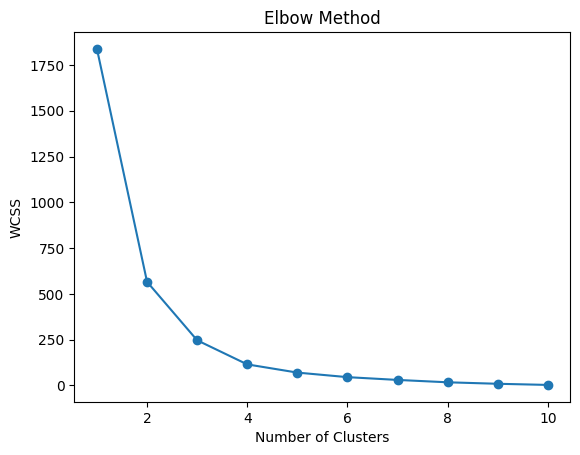

In [31]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
means = KMeans(n_clusters=2, random_state=42)
merge_data['cluster'] = means.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
lab = means.labels_

In [35]:
print(lab)

[0 0 0 ... 0 0 0]


In [36]:
cluster_centers = means.cluster_centers_

In [42]:
sectors_cluster_0 = set([merge_data['GICS Sector'][i] for i in range(len(merge_data['GICS Sector'])) if merge_data['cluster'][i] == 0])
sectors_cluster_1 = set([merge_data['GICS Sector'][i] for i in range(len(merge_data['GICS Sector'])) if merge_data['cluster'][i] == 1])

In [43]:
print("Sectors in Cluster 0:", sectors_cluster_0)
print("Sectors in Cluster 1:", sectors_cluster_1)

Sectors in Cluster 0: {'Telecommunications Services', 'Health Care', 'Information Technology', 'Real Estate', 'Utilities', 'Industrials', 'Materials'}
Sectors in Cluster 1: {'Financials', 'Consumer Staples', 'Energy', 'Consumer Discretionary'}


In [ ]:
merge_data['cluster']=means.labels_

In [ ]:
merge_data['cluster']

0       0
1       0
2       0
3       0
4       0
       ..
1833    1
1834    0
1835    0
1836    0
1837    0
Name: cluster, Length: 1838, dtype: int32

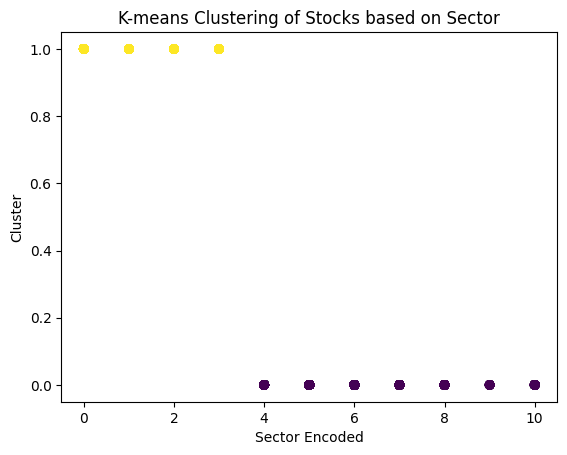

In [33]:
plt.scatter(merge_data['sector_encoded'], merge_data['cluster'], c=merge_data['cluster'], cmap='viridis')
plt.xlabel('Sector Encoded')
plt.ylabel('Cluster')
plt.title('K-means Clustering of Stocks based on Sector')
plt.show()